In [1]:
import statsmodels.api as sm
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

url = 'E:\\Dessertation\\desertion_dkit_msc_2022_sep\\output.csv'

df = pd.read_csv(url)
df.tail()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
13271,Ukraine,2015,female,35-54 years,427,6309963,6.77,Ukraine2015,9.103096e+10,2256,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,UKR,0.009469
13272,Ukraine,2015,female,15-24 years,117,2281055,5.13,Ukraine2015,9.103096e+10,2256,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,UKR,0.009469
13273,Ukraine,2015,female,25-34 years,168,3421535,4.91,Ukraine2015,9.103096e+10,2256,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,UKR,0.009469
13274,Ukraine,2015,male,5-14 years,33,2131084,1.55,Ukraine2015,9.103096e+10,2256,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,UKR,0.009469
13275,Ukraine,2015,female,5-14 years,19,2010824,0.94,Ukraine2015,9.103096e+10,2256,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Europe,UKR,0.009469


In [2]:
# Create the bar plot

fig = px.bar(df,x='year',y='suicides',color='continent',title='Suicides by Continent',)

# Show the plot
fig.show()

In [3]:
df.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469


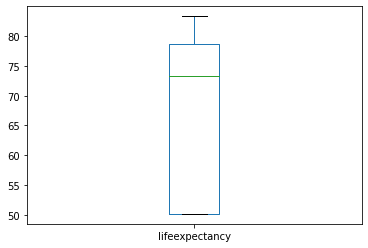

In [47]:
# define function called plot_box
def plot_box(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()


# plot the diagram
plot_box(df, "lifeexpectancy")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13276 entries, 0 to 13275
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               13276 non-null  object 
 1   year                  13276 non-null  int64  
 2   sex                   13276 non-null  object 
 3   age                   13276 non-null  object 
 4   suicides              13276 non-null  int64  
 5   population            13276 non-null  int64  
 6   sucid_in_hundredk     13276 non-null  float64
 7   country-year          13276 non-null  object 
 8   yearly_gdp            13276 non-null  float64
 9   gdp_per_capita        13276 non-null  int64  
 10  generation            13276 non-null  object 
 11  internetusers         13276 non-null  float64
 12  expenses              12124 non-null  float64
 13  employeecompensation  12076 non-null  float64
 14  unemployment          13276 non-null  float64
 15  physician_price    

In [5]:
## Animation frame

#create coloured region map by lifeExp
fig= px.choropleth(df,               
              locations="country_code", color="gdp_per_capita",
              hover_name="country",  
              animation_frame="year")
fig.show()

In [6]:
## Animation frame

#create coloured region map by lifeExp
fig= px.choropleth(df,               
              locations="country_code", color="suicides",
              hover_name="country",  
              animation_frame="year")
fig.show()

In [7]:
dff=df.groupby(["country"], as_index=False)[["sucid_in_hundredk","gdp_per_capita"]].mean()

scatterplot = px.scatter(
        data_frame=dff,
        x="sucid_in_hundredk",
        y="gdp_per_capita",
        hover_data=['country'],
        text="country",
        height=540    )
scatterplot.show()

In [8]:
# df1 = df.set_index('year')

In [9]:
# df.groupby(lambda x: x.year)['sucid_in_hundredk'].agg(['sum', 'mean', 'max'])

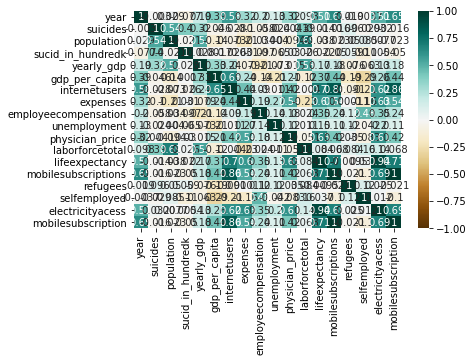

In [10]:
correlations = df.corr()

sns.heatmap(correlations, center=0, annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

Text(0.5, 0, 'Suicides per 100K')

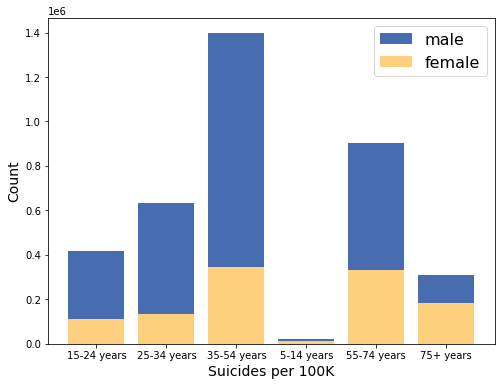

In [11]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides.sum())

plt.bar(agedistm.index, agedistm.suicides, color=col[18])
plt.bar(agedistf.index, agedistf.suicides, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

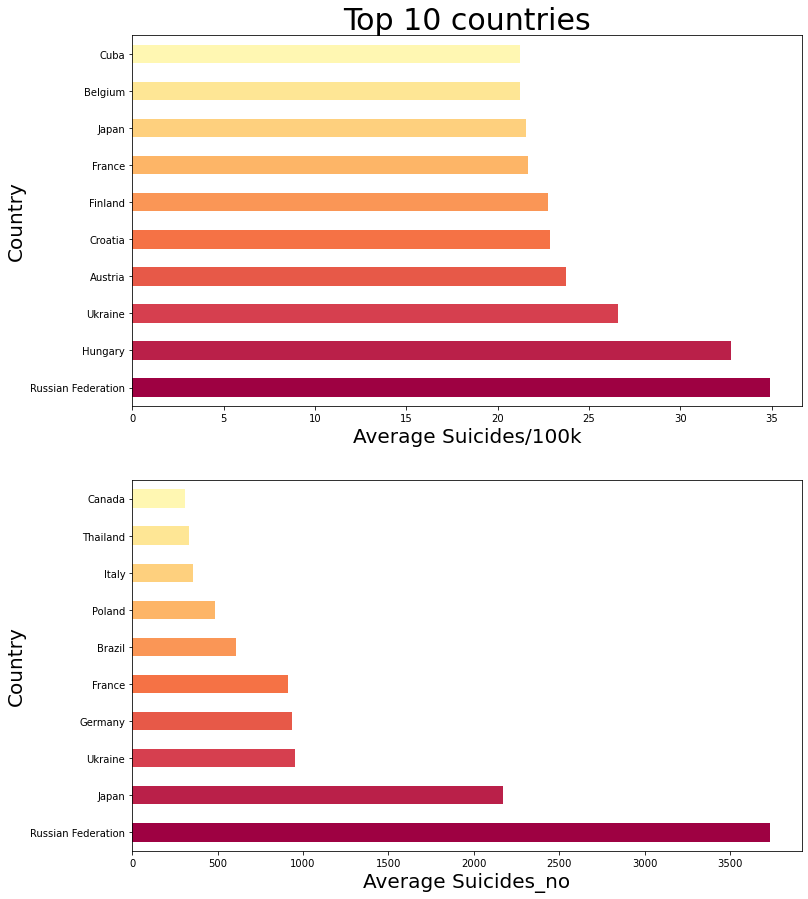

In [12]:
plt.figure(figsize=(12, 15))

col = plt.cm.Spectral(np.linspace(0, 1, 20))
plt.subplot(211)
df.groupby(['country']).sucid_in_hundredk.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicides.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

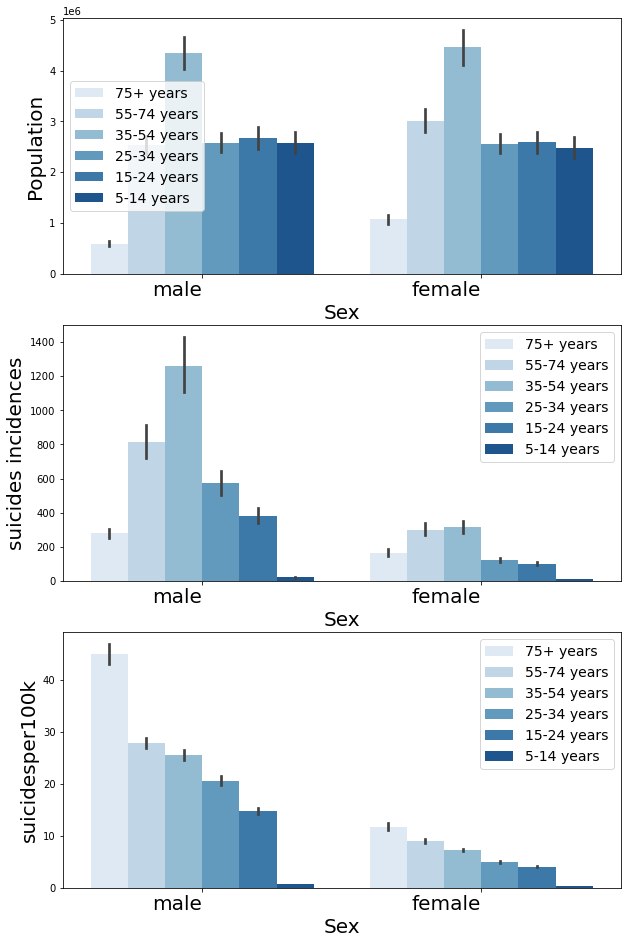

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='sucid_in_hundredk', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

Text(0, 0.5, 'Total number of suicides in the world')

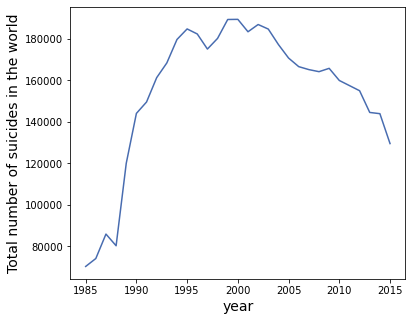

In [14]:
year = df.groupby('year').year.unique()

plt.figure(figsize=(6, 5))

totalpyear = pd.DataFrame(df.groupby('year').suicides.sum())

plt.plot(year.index[0:31], totalpyear[0:31], color=col[18])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

Text(0, 0.5, 'count')

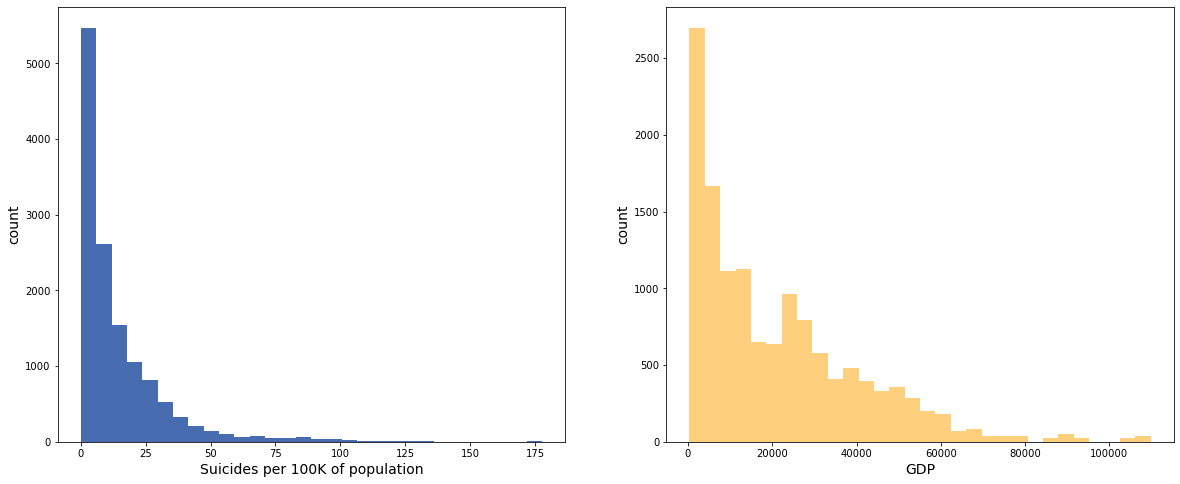

In [15]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.sucid_in_hundredk, bins=30, color=col[18])
plt.xlabel('Suicides per 100K of population', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.subplot(122)
plt.hist(df.gdp_per_capita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)
plt.ylabel('count', fontsize=14)

In [16]:
df.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469


<AxesSubplot:xlabel='gdp_per_capita', ylabel='suicides'>

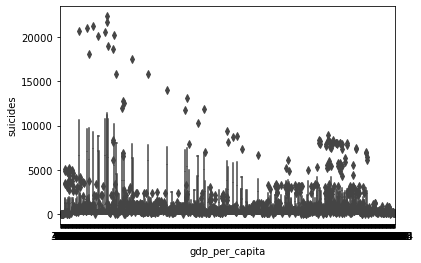

In [17]:
import seaborn as sns
sns.boxplot(x='gdp_per_capita', y='suicides', data=df   )

In [19]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'internetusers', 'expenses', 'employeecompensation',
       'unemployment', 'physician_price', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptions', 'refugees', 'selfemployed', 'electricityacess',
       'continent', 'country_code', 'mobilesubscription'],
      dtype='object')

In [26]:
countrynames = df['country'].unique()
countrynames

array(['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Croatia',
       'Cuba', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkmenistan', 'Ukraine'], dtype=object)

In [37]:
features = ['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'internetusers']

total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()

total['suicides'] = df[['country', 'year', 'sucid_in_hundredk']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

total['country'] = countrynames[0]

for i, x in enumerate(countrynames[1:]):
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['suicides'] = df[['country', 'year', 'sucid_in_hundredk']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    suicides['country'] = x
    total = total.append(suicides)

total.reset_index(inplace=True)
sort = True

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'GDP')

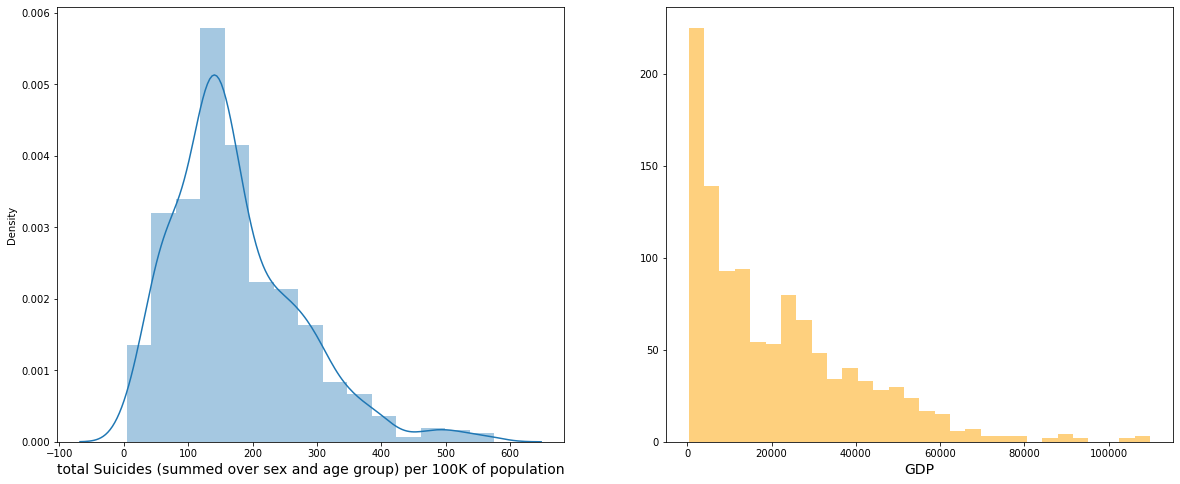

In [40]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.distplot(total.suicides, bins=15)
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)

plt.subplot(122)
plt.hist(total.gdp_per_capita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)

Text(0.5, 0, 'year')

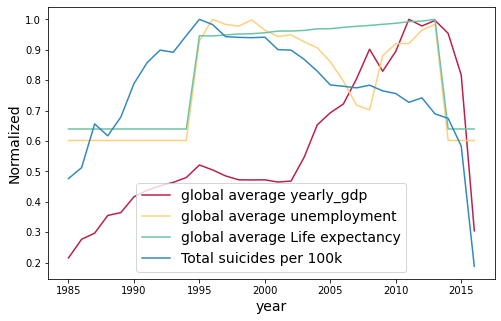

In [44]:
plt.figure(figsize=(8, 5))

suicides = df[['year', 'yearly_gdp', 'selfemployed', 'unemployment', 'lifeexpectancy']].groupby('year').mean()
suicides['suicides'] = df[['country', 'year', 'sucid_in_hundredk']].groupby('year').sum()

plt.plot(suicides.index, suicides.yearly_gdp/suicides.yearly_gdp.max(), color=col[1])
plt.plot(suicides.index, suicides.unemployment/suicides.unemployment.max(), color=col[7])
plt.plot(suicides.index, suicides.lifeexpectancy/suicides.lifeexpectancy.max(), color=col[15])
plt.plot(suicides.index, suicides.suicides/suicides.suicides.max(), color=col[17])
plt.legend(['global average yearly_gdp', 'global average unemployment', 'global average Life expectancy', 'Total suicides per 100k'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

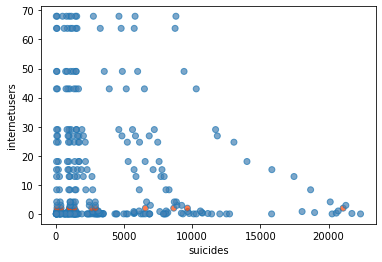

In [54]:
russia_suic = df[df.country == 'Russian Federation']
# Make an array of colors based upon if a row is a given year
cinci_colors = ['orangered' if year == 2000 else 'steelblue'
for year in russia_suic.year]
# Plot with additional scatter plot argument facecolors
p = sns.regplot(x='suicides',
y='internetusers',
data = russia_suic,
fit_reg=False,
scatter_kws={'facecolors': cinci_colors,'alpha': 0.7})

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:xlabel='suicides', ylabel='Density'>

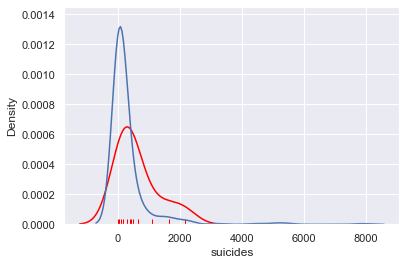

In [63]:
import seaborn as sns; sns.set_theme()
df_nov = df[df.year == 2015]
sns.distplot(df_nov[df_nov.country == 'Ukraine'].suicides,
hist=False, color='red', rug=True)
sns.distplot(df_nov[df_nov.country != 'Ukraine'].suicides, hist=False)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\ProgramData\Anaconda3\lib\site-packag

Text(0.5, 0, 'Suicide Rates')

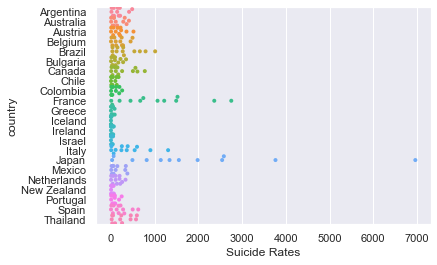

In [66]:
suic_country = df[df.year == 1985]
sns.swarmplot(y="country", x="suicides", data=suic_country, size=4)
plt.xlabel("Suicide Rates")

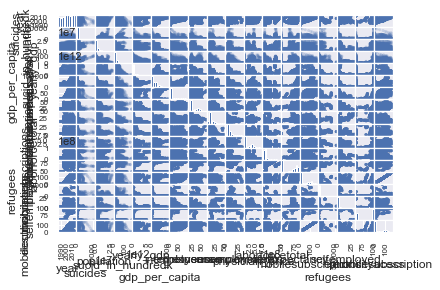

In [71]:

# Just show median
# df.describe(percentiles=[0.5],include=totalfeatures)
pd.plotting.scatter_matrix(df, alpha = 0.2);

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sucid_in_hundredk', ylabel='yearly_gdp'>

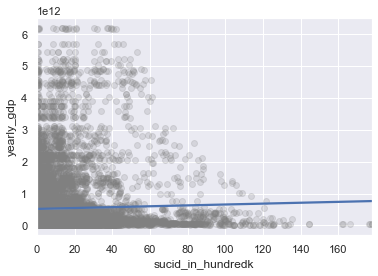

In [72]:
sns.regplot('sucid_in_hundredk', 'yearly_gdp', ci=False, data=df,
# Lower opacity of points
scatter_kws={'alpha':0.2, 'color':'grey'} )

In [ ]:
totalfeatures = ['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'internetusers', 'expenses', 'employeecompensation',
       'unemployment', 'physician_price', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptions', 'refugees', 'selfemployed', 'electricityacess',
       'continent', 'country_code', 'mobilesubscription']

In [77]:
g = sns.scatterplot("sucid_in_hundredk","age", data=df)
# Iterate over the rows of our data
for _, row in df.iterrows():
    # Unpack columns from row
    year, sucid_in_hundredk, age = row
    # Draw annotation in correct place
    g.annotate(year, (sucid_in_hundredk,age))
plt.title('avg sucid_in_hundredk by age')